<a href="https://colab.research.google.com/github/ochekroun/labs/blob/master/IFAGE_Cours_1_MNIST_avec_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔢 Reconnaitre des chiffres avec Keras

Dans ce premier "vrai" notebook, nous allons entrainer un modèle pour reconnaitre les chiffres du dataset MNIST.

Tiré de https://keras.io/examples/vision/mnist_convnet/

## Installation de Keras

In [1]:
!pip install -U keras --use-deprecated=legacy-resolver

Requirement already up-to-date: keras in /usr/local/lib/python3.10/dist-packages (3.3.3)


In [2]:
# utilisons pytorch plutôt que tensorflow
import os
os.environ["KERAS_BACKEND"] = "torch"

## Exploration du jeu de donnée

In [3]:
# importons la librairie keras et numpy
import keras
import numpy as np

In [4]:
# le jeu de donnée MNIST est disponible directement depuis Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
import matplotlib.pyplot as plt

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

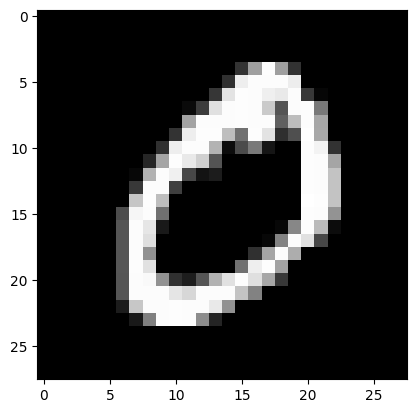

In [10]:
plt.imshow(x_train[1], cmap="gray")

## Normalisation des données

In [11]:
# Normalise les données pour être entre 0.0 et 1.0
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Mise en forme des labels

In [14]:
y_train[0]

5

In [15]:
from keras.utils import to_categorical

# nombre de classe de notre modèle
num_classes = 10

# on mets les données en forme avec l'encodage "one-hot"
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [16]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

## 🧠 Construction du modèle

In [17]:
from keras import layers

model = keras.Sequential(
    [
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(200, activation="relu"),
        layers.Dense(100, activation="relu"),
        layers.Dense(75, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
28*28*200

156800

In [19]:
# "résumé" de notre modèle
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │         157,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 75)                  │           7,575 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             760 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,435 (724.36 KB)

 Trainable params: 185,435 (724.36 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [21]:
model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=3,
    validation_split=0.1
)

Epoch 1/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8216 - loss: 0.6059 - val_accuracy: 0.9653 - val_loss: 0.1200
Epoch 2/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9618 - loss: 0.1289 - val_accuracy: 0.9733 - val_loss: 0.0890
Epoch 3/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9752 - loss: 0.0824 - val_accuracy: 0.9768 - val_loss: 0.0771


In [22]:
model.evaluate(x_test, y_test, verbose=0)

[0.08027849346399307, 0.973800003528595]

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.08027849346399307
Test accuracy: 0.973800003528595


In [24]:
for weigths in model.get_weights():
  print(weigths.size)

156800
200
20000
100
7500
75
750
10


## Evaluation sur un example spécifique

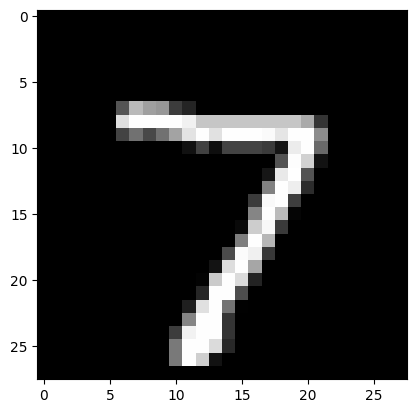

In [25]:
plt.imshow(x_test[0], cmap="gray")

In [26]:
# ceci ne marche pas - le modèle travaille sur plusieurs entrées à la fois !
#prediction = model.predict(x_test[0])

In [27]:
# une des façons possible d'ajouter une dimension
np.expand_dims(x_test[0], 0).shape

(1, 28, 28)

In [28]:
# une autre façon
np.array([x_test[0]]).shape

(1, 28, 28)

In [29]:
# en utilisant l'une ou l'autre solution, on peut maintenant obtenir une prédiction
prediction = model.predict(np.array([x_test[0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [30]:
prediction

array([[1.0379210e-05, 7.2021708e-06, 5.9650443e-04, 9.0924446e-03,
        1.8322506e-08, 1.1049243e-05, 2.0103942e-10, 9.9011594e-01,
        2.9352914e-05, 1.3713166e-04]], dtype=float32)

Text(0, 0.5, 'Probability')

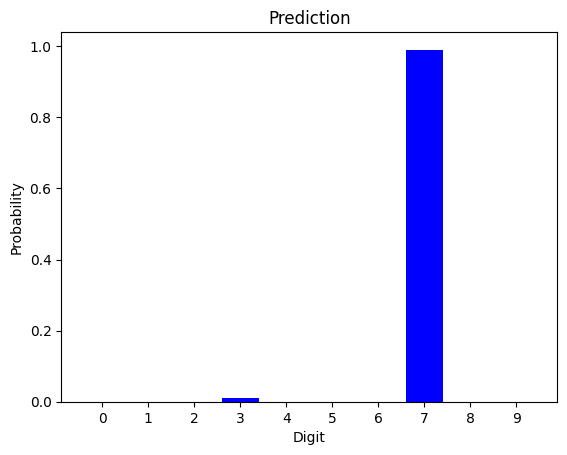

In [31]:
import matplotlib.pyplot as plt

plt.bar(range(10), prediction[0], color='blue')
plt.title('Prediction')
plt.xticks(range(10))
plt.xlabel('Digit')
plt.ylabel('Probability')

## Calculons la perte selon le label

In [32]:
cce = keras.losses.CategoricalCrossentropy()

In [33]:
y_true = np.array([[0,0,0,0,0,0,0,1,0,0]])

In [34]:
cce(prediction, y_true).item()

0.15931271016597748